In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import kaleido
import matplotlib.pyplot as plt
import pm4py
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import plotly.io as pio
import plotly.offline as pyo
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
# pyo.init_notebook_mode(connected=False)
# pio.renderers.default='notebook+pdf'

In [10]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

# Подготовка путей

In [3]:
paths = [
"/Users/valentina/Desktop/datasets/Dreamacro/clash/1714024639",
"/Users/valentina/Desktop/datasets/FiloSottile/mkcert/1713725714",
"/Users/valentina/Desktop/datasets/alist-org/alist/1714400580",
"/Users/valentina/Desktop/datasets/antonmedv/fx/1714495475",
"/Users/valentina/Desktop/datasets/aquasecurity/trivy/1717128023",
"/Users/valentina/Desktop/datasets/astaxie/build-web-application-with-golang/1713550000",
"/Users/valentina/Desktop/datasets/avelino/awesome-go/1713151727",
"/Users/valentina/Desktop/datasets/beego/beego/1714708320",
"/Users/valentina/Desktop/datasets/buger/goreplay/1715446242",
"/Users/valentina/Desktop/datasets/caddyserver/caddy/1713431218",
"/Users/valentina/Desktop/datasets/charmbracelet/bubbletea/1714410136",
"/Users/valentina/Desktop/datasets/cli/cli/1714589198",
"/Users/valentina/Desktop/datasets/cloudreve/Cloudreve/1715420989",
"/Users/valentina/Desktop/datasets/cockroachdb/cockroach/1716646857",
"/Users/valentina/Desktop/datasets/containers/podman/1715495638",
"/Users/valentina/Desktop/datasets/coreybutler/nvm-windows/1715103740",
"/Users/valentina/Desktop/datasets/dapr/dapr/1715001823",
"/Users/valentina/Desktop/datasets/derailed/k9s/1715175793",
"/Users/valentina/Desktop/datasets/docker/compose/1714741373",
"/Users/valentina/Desktop/datasets/ehang-io/nps/1715483904",
"/Users/valentina/Desktop/datasets/etcd-io/etcd/1717477424",
"/Users/valentina/Desktop/datasets/ethereum/go-ethereum/1713632067",
"/Users/valentina/Desktop/datasets/evanw/esbuild/1714102421",
"/Users/valentina/Desktop/datasets/fatedier/frp/1713313673",
"/Users/valentina/Desktop/datasets/filebrowser/filebrowser/1715323040",
"/Users/valentina/Desktop/datasets/fyne-io/fyne/1716245798",
"/Users/valentina/Desktop/datasets/gin-gonic/gin/1713196927",
"/Users/valentina/Desktop/datasets/github/hub/1714815123",
"/Users/valentina/Desktop/datasets/go-delve/delve/1715126966",
"/Users/valentina/Desktop/datasets/go-gitea/gitea/1714117892",
"/Users/valentina/Desktop/datasets/go-gorm/gorm/1714576115",
"/Users/valentina/Desktop/datasets/go-kit/kit/1715474901",
"/Users/valentina/Desktop/datasets/go-kratos/kratos/1715142915",
"/Users/valentina/Desktop/datasets/go-micro/go-micro/1715107618",
"/Users/valentina/Desktop/datasets/go-redis/redis/1715734586",
"/Users/valentina/Desktop/datasets/gocolly/colly/1717835813",
"/Users/valentina/Desktop/datasets/gofiber/fiber/1716211732",
"/Users/valentina/Desktop/datasets/gogs/gogs/1713510983",
"/Users/valentina/Desktop/datasets/goharbor/harbor/1716302646",
"/Users/valentina/Desktop/datasets/gohugoio/hugo/1713275539",
"/Users/valentina/Desktop/datasets/golang/go/1715744529",
"/Users/valentina/Desktop/datasets/gorilla/mux/1709350879",
"/Users/valentina/Desktop/datasets/grafana/k6/1715284220",
"/Users/valentina/Desktop/datasets/grafana/loki/1715333927",
"/Users/valentina/Desktop/datasets/grpc/grpc-go/1715385436",
"/Users/valentina/Desktop/datasets/halfrost/LeetCode-Go/1714734223",
"/Users/valentina/Desktop/datasets/harness/drone/1716916192",
"/Users/valentina/Desktop/datasets/hashicorp/consul/1716921837",
"/Users/valentina/Desktop/datasets/hashicorp/vault/1714766715",
"/Users/valentina/Desktop/datasets/helm/helm/1714714663",
"/Users/valentina/Desktop/datasets/iawia002/lux/1715103340",
"/Users/valentina/Desktop/datasets/inancgumus/learngo/1715443684",
"/Users/valentina/Desktop/datasets/inconshreveable/ngrok/1714798427",
"/Users/valentina/Desktop/datasets/influxdata/influxdb/1715109663",
"/Users/valentina/Desktop/datasets/istio/istio/1714387697",
"/Users/valentina/Desktop/datasets/jaegertracing/jaeger/1715424582",
"/Users/valentina/Desktop/datasets/jesseduffield/lazydocker/1715105339",
"/Users/valentina/Desktop/datasets/jesseduffield/lazygit/1716612906",
"/Users/valentina/Desktop/datasets/joewalnes/websocketd/1714409069",
"/Users/valentina/Desktop/datasets/junegunn/fzf/1713321431",
"/Users/valentina/Desktop/datasets/k3s-io/k3s/1714833508",
"/Users/valentina/Desktop/datasets/kataras/iris/1714764289",
"/Users/valentina/Desktop/datasets/kubernetes/kubernetes/1716612896",
"/Users/valentina/Desktop/datasets/kubernetes/minikube/1715959310",
"/Users/valentina/Desktop/datasets/labstack/echo/1715347044",
"/Users/valentina/Desktop/datasets/matryer/xbar/1714445866",
"/Users/valentina/Desktop/datasets/mattermost/mattermost-server/1715356367",
"/Users/valentina/Desktop/datasets/minio/minio/1713726236",
"/Users/valentina/Desktop/datasets/moby/moby/1717300347",
"/Users/valentina/Desktop/datasets/nektos/act/1714218464",
"/Users/valentina/Desktop/datasets/nsqio/nsq/1714775146",
"/Users/valentina/Desktop/datasets/openfaas/faas/1714787702",
"/Users/valentina/Desktop/datasets/photoprism/photoprism/1716175990",
"/Users/valentina/Desktop/datasets/pingcap/tidb/1714225477",
"/Users/valentina/Desktop/datasets/pocketbase/pocketbase/1715063379",
"/Users/valentina/Desktop/datasets/portainer/portainer/1716147790",
"/Users/valentina/Desktop/datasets/prometheus/prometheus/1717638231",
"/Users/valentina/Desktop/datasets/rancher/rancher/1714915806",
"/Users/valentina/Desktop/datasets/rclone/rclone/1713796158",
"/Users/valentina/Desktop/datasets/restic/restic/1715235119",
"/Users/valentina/Desktop/datasets/schollz/croc/1716237455",
"/Users/valentina/Desktop/datasets/seaweedfs/seaweedfs/1715684506",
"/Users/valentina/Desktop/datasets/sirupsen/logrus/1714855866",
"/Users/valentina/Desktop/datasets/slimtoolkit/slim/1714490167",
"/Users/valentina/Desktop/datasets/spf13/cobra/1714640830",
"/Users/valentina/Desktop/datasets/spf13/viper/1717834339",
"/Users/valentina/Desktop/datasets/syncthing/syncthing/1713334261",
"/Users/valentina/Desktop/datasets/tmrts/go-patterns/1714897134",
"/Users/valentina/Desktop/datasets/traefik/traefik/1713597779",
"/Users/valentina/Desktop/datasets/tsenart/vegeta/1714912003",
"/Users/valentina/Desktop/datasets/uber-go/zap/1715380773",
"/Users/valentina/Desktop/datasets/unknwon/the-way-to-go_ZH_CN/1714568518",
"/Users/valentina/Desktop/datasets/urfave/cli/1715154374",
"/Users/valentina/Desktop/datasets/v2fly/v2ray-core/1715036622",
"/Users/valentina/Desktop/datasets/v2ray/v2ray-core/1713575261",
"/Users/valentina/Desktop/datasets/wagoodman/dive/1714024640",
"/Users/valentina/Desktop/datasets/yeasy/docker_practice/1714888571",
"/Users/valentina/Desktop/datasets/yudai/gotty/1715384779",
"/Users/valentina/Desktop/datasets/zeromicro/go-zero/1714800528",
"/Users/valentina/Desktop/datasets/zyedidia/micro/1714897333",
]

In [4]:
community = [
'gogs',
'build-web-application-with-golang',
'lazygit',
'the-way-to-go_ZH_CN',
'cobra',
'ngrok',
'logrus',
'viper',
'docker_practice',
'croc',
'pocketbase',
'lux',
'go-micro',
'restic',
'mux',
'bubbletea',
]
community_paths = []
for path in paths:
    for repo in community:
        if repo.lower() in path.lower():
            community_paths.append(path)
            break
    

In [5]:
monarchist = [
    "hugo",
    "frp",
    "fzf",
    "v2ray-core",
    "mkcert",
    "dive",
    "act",
    "gorm",
    "beego",
    "LeetCode-Go",
    "nvm-windows",
    "lazydocker",
    "nps",
    "hub",
    "go-patterns",
    "micro",
    "vegeta",
    "cli",
    "filebrowser",
    "gotty",
    "learngo",
    "websocketd",
    "xbar",
    "seaweedfs",
]
monarchist_paths = []
for path in paths:
    for repo in monarchist:
        if repo.lower() in path.lower():
            monarchist_paths.append(path)
            break
    

In [6]:
corporate = [
    "caddy",
    "traefik",
    "minio",
    "rclone",
    "terraform",
    "esbuild",
    "gitea",
    "tidb",
    "cli",
    "compose",
    "vault",
    "cockroach",
    "consul",
    "influxdb",
    "echo",
    "mattermost-server",
    "portainer",
    "photoprism",
    "iris",
    "faas",
    "rancher",
    "dapr",
    "delve",
    "fyne",
    "k6",
    "loki",
    "zap",
    "Cloudreve",
    "goreplay",
    "alist",
    "podman",
    "redis",
    "slim",
    "trivy",
]

corporate_paths = []
for path in paths:
    for repo in corporate:
        if repo.lower() in path.lower():
            corporate_paths.append(path)
            break
    

In [7]:
foundation = [
    "go",
    "kubernetes",
    "moby",
    "syncthing",
    "prometheus",
    "etcd",
    "go-ethereum",
    "istio",
    "drone",
    "minikube",
    "kit",
    "fiber",
    "helm",
    "nsq",
    "go-zero",
    "k3s",
    "v2ray-core",
    "kratos",
    "k9s",
    "harbor",
    "grpc-go",
    "jaeger",
]

foundation_paths = []
for path in paths:
    for repo in foundation:
        if repo.lower() in path.lower():
            foundation_paths.append(path)
            break

In [8]:
solo = [
    "awesome-go",
    "fx"
]

solo_paths = []
for path in paths:
    for repo in solo:
        if repo.lower() in path.lower():
            solo_paths.append(path)
            break

In [9]:
grouped_file_extensions = {
    "documents": [
        ".txt",      # Текстовый файл
        ".pdf",      # PDF документ
        ".doc",      # Microsoft Word (старый формат)
        ".docx",     # Microsoft Word
        ".xls",      # Microsoft Excel (старый формат)
        ".xlsx",     # Microsoft Excel
        ".ppt",      # Microsoft PowerPoint (старый формат)
        ".pptx",     # Microsoft PowerPoint
        ".odt",      # OpenDocument текст
        ".ods",      # OpenDocument таблица
        "MAINTAINERS", "LICENSE",
        ".odp",      # OpenDocument презентация
        ".rtf",      # Rich Text Format документ
        ".csv",       # CSV файл (разделённый запятыми),
        ".md~",        # CSV файл (разделённый запятыми)
        ".md"       # CSV файл (разделённый запятыми)
    ],

    "image": [
        ".jpg",      # JPEG изображение
        ".jpeg",     # JPEG изображение
        ".png",      # PNG изображение
        ".gif",      # GIF изображение
        ".bmp",      # BMP изображение
        ".tiff",     # TIFF изображение
        ".svg",      # SVG (векторная графика)
        ".webp"      # WebP изображение
    ],
    "audio": [
        ".mp3",      # MP3 аудиофайл
        ".wav",      # WAV аудиофайл
        ".aac",      # AAC аудиофайл
        ".flac",     # FLAC аудиофайл
        ".ogg",      # Ogg Vorbis аудиофайл
        ".m4a"       # MPEG-4 аудиофайл
    ],

    "video": [
        ".mp4",      # MP4 видеофайл
        ".avi",      # AVI видеофайл
        ".mov",      # QuickTime видео
        ".wmv",      # Windows Media Video
        ".flv",      # Flash Video
        ".mkv",      # MKV видеофайл
        ".webm",     # WebM видеофайл
        ".mpeg",     # MPEG видеофайл
        ".mpg"       # MPEG видеофайл
    ],

    "archives_and_compressed_files": [
        ".zip",      # ZIP архив
        ".rar",      # RAR архив
        ".7z",       # 7-Zip архив
        ".tar",      # TAR архив
        ".gz",       # Gzip архив
        ".bz2",      # Bzip2 архив
        ".xz"        # XZ архив
    ],

    "source_code": [
        ".exe",      # Исполняемый файл Windows
        ".msi",      # Установочный пакет Windows
        ".apk",      # Android пакет
        ".bat",      # Batch-скрипт (Windows)
        ".sh",       # Shell-скрипт (Linux/Mac)
        ".bash",       
        ".zsh",       
        ".dmg",      # Образ диска macOS
        ".app",      # Приложение macOS
        ".bin",
        ".py",       # Python скрипт
        ".java",     # Java исходный код
        ".c",        # C исходный код
        ".cpp",      # C++ исходный код
        ".cs",       # C# исходный код
        ".js",       # JavaScript файл
        ".html",     # HTML документ
        ".css",      # CSS файл
        ".php",      # PHP скрипт
        ".rb",       # Ruby скрипт
        ".swift",    # Swift исходный код
        ".go",       # Go исходный код
        ".rs",       # Rust исходный код
        ".xml",      # XML документ
        ".json",     # JSON документ
        "go.mod",
        "go.sum",
        ".sql"       # SQL файл (база данных)
    ],

    "database": [
        ".db",       # Файл базы данных
        ".sqlite",   # SQLite база данных
        ".mdb",      # Microsoft Access база
        ".accdb"     # Microsoft Access база
    ],

    "configuration_deployment_and_system": [
        ".ini",      # INI-файл (настройки)
        ".cfg",      # Конфигурационный файл
        ".yml",      # YAML файл
        ".yaml",     # YAML файл
        ".conf",     # Конфигурационный файл
        ".toml",     # YAML файл
        ".dockerignore",     # YAML файл
        "Makefile", "Dockerfile",
        ".gitignore",     # YAML файл
        ".log"       # Лог-файл
    ],

    "fonts": [
        ".ttf",      # TrueType шрифт
        ".otf",      # OpenType шрифт
        ".woff",     # Web Open Font Format
        ".woff2"     # Web Open Font Format 2
    ],

    "3D_models": [
        ".obj",      # Wavefront 3D объект
        ".fbx",      # Filmbox 3D файл
        ".stl",      # Stereolithography (для 3D печати)
        ".dae"       # Collada 3D файл
        ]
    }

# Первостепенные попытки анализа, черновик

## Формирование лога


In [18]:
def form_user_event_log(path, logs_list):
    user = pd.read_csv(
        f"{path}/user-commit.csv"
    )
    
    user.columns = ['user_' + str(col) for col in user.columns]
    user["user_event"] = "user_" + user["user_event"]
    user["activity"] = user["user_event"]
    user["case_id"] = user["user_commit_sha"]
    user["timestamp"] = pd.to_datetime(user["user_date"])
    del user["user_date"]
    user_event_log = dataframe_utils.convert_timestamp_columns_in_df(user)
    logs_list.extend([user_event_log])

In [21]:
def form_base_event_log(path, logs_list):
    commits = pd.read_csv(f"{path}/commits.csv")

    commits["commit_date"] = pd.to_datetime(commits["commit_date"])
    commits["create_date"] = pd.to_datetime(commits["create_date"])
    commits.columns = ['commit_' + str(col) for col in commits.columns]
    commits["case_id"] = commits["commit_sha"]

    common_cols = [col for col in commits.columns if col not in ['commit_commit_date', 'commit_create_date']]

    commits_created = commits.copy()
    commits_created['timestamp'] = commits_created['commit_create_date']
    commits_created['activity'] = 'commit_created'
    commits_created = commits_created[common_cols + ['timestamp', 'activity']]

    commits_updated = commits.copy()
    commits_updated['timestamp'] = commits_updated['commit_commit_date']
    commits_updated['activity'] = 'commit_committed'
    commits_updated = commits_updated[common_cols + ['timestamp', 'activity']]

    commits_event_log = pd.concat([commits_created, commits_updated], ignore_index=True)
    commits_event_log = dataframe_utils.convert_timestamp_columns_in_df(commits_event_log)
    commits_shas = commits_event_log["case_id"].unique()

    # def file_type(name: str):
    #     if name.endswith(".go") and "test" in name:
    #         return "test"
    #     for k, v in grouped_file_extensions.items():
    #         for n in v:
    #             if name.endswith(n):
    #                 return k
    #     return "another"

    # files_event_log = pd.read_csv(
    #     f"{path}/file_commit.csv"
    # )
    # files_event_log.columns = ['file_' + str(col) for col in files_event_log.columns]
    # files_event_log["case_id"] = files_event_log["file_commit_sha"]
    # files_event_log["file_type"] = files_event_log["file_filename"].apply(file_type)
    # files_event_log["timestamp"] = pd.to_datetime(files_event_log["file_last_modified"], format="%a, %d %b %Y %H:%M:%S GMT")
    # files_event_logs = []

    # for ftype in files_event_log["file_type"].unique():
    #     tmp = files_event_log[files_event_log["file_type"] == ftype].copy()
    #     tmp['activity'] = f'file_modify_{ftype}'
        
    #     files_event_logs.append(tmp)
        
    # files_event_log = pd.concat(files_event_logs, ignore_index=True)
    # files_event_log = dataframe_utils.convert_timestamp_columns_in_df(files_event_log)

    def release_type(row):
        release_activity_type = row["release_activity_type"]
        if row["release_prerelease"] == True and row["release_draft"] == True:
            return f"release_draft_prerelease_{release_activity_type}"
        if row["release_prerelease"] == True and row["release_draft"] == False:
            return f"release_prerelease_{release_activity_type}"
        if row["release_prerelease"] == False and row["release_draft"] == True:
            return f"release_draft_{release_activity_type}"
        return f"release_{release_activity_type}"

    release = pd.read_csv(
        f"{path}/release-commit.csv"
    )
    release = release[release["commit_sha"].isin(commits_shas)]
    release["created_at"] = pd.to_datetime(release["created_at"])
    release["published_at"] = pd.to_datetime(release["published_at"])
    release.columns = ['release_' + str(col) for col in release.columns]
    release["case_id"] = release["release_commit_sha"]

    release_cols = [col for col in release.columns if col not in ['release_created_at', 'release_published_at']] + ['timestamp', 'activity']

    release_published = release.copy()
    release_published['timestamp'] = release_published['release_published_at']
    release_published['release_activity_type'] = "published"
    release_published['activity'] = release_published.apply(release_type, axis=1)

    release_published = release_published[release_cols]

    release_created = release.copy()
    release_created['timestamp'] = release_created['release_created_at']
    release_created['release_activity_type'] = "created"
    release_created['activity'] = release_created.apply(release_type, axis=1)
    release_created = release_created[release_cols]

    release_event_log = pd.concat([release_created, release_published], ignore_index=True)
    release_event_log = dataframe_utils.convert_timestamp_columns_in_df(release_event_log)

    pull_request = pd.read_csv(
        f"{path}/pull_request-commit.csv"
    )
    pull_request["updated_at"] = pd.to_datetime(pull_request["updated_at"])
    pull_request["created_at"] = pd.to_datetime(pull_request["created_at"])
    pull_request["closed_at"] = pd.to_datetime(pull_request["closed_at"])
    pull_request["merged_at"] = pd.to_datetime(pull_request["merged_at"])
    pull_request.columns = ['pull_request_' + str(col) for col in pull_request.columns]
    pull_request["case_id"] = pull_request["pull_request_commit_sha"]

    time_col = ['pull_request_created_at', 'pull_request_updated_at', 'pull_request_closed_at', 'pull_request_merged_at']
    pull_request_col = [col for col in pull_request.columns if col not in time_col]

    l = []
    for col in time_col:
        tmp = pull_request.copy()
        tmp['timestamp'] = tmp[col]
        tmp['activity'] = col
        tmp = tmp[pull_request_col + ['timestamp', 'activity']]
        l.append(tmp)

    pull_request_event_log = pd.concat(l, ignore_index=True)
    pull_request_event_log = dataframe_utils.convert_timestamp_columns_in_df(pull_request_event_log)
    # user = pd.read_csv(
    #     f"{path}/user-commit.csv"
    # )
    
    # user.columns = ['user_' + str(col) for col in user.columns]
    # user["user_event"] = "user_" + user["user_event"]
    # user["activity"] = user["user_event"]
    # user["case_id"] = user["user_commit_sha"]
    # user["timestamp"] = pd.to_datetime(user["user_date"])
    # del user["user_date"]
    # user_event_log = dataframe_utils.convert_timestamp_columns_in_df(user)

    comment_commit = pd.read_csv(f"{path}/comment-commit.csv")
    comment_commit["updated_at"] = pd.to_datetime(comment_commit["updated_at"])
    comment_commit["created_at"] = pd.to_datetime(comment_commit["created_at"])
    comment_commit.columns = ['comment_' + str(col) for col in comment_commit.columns]
    comment_commit["case_id"] = comment_commit["comment_commit_sha"]

    time_col = ['comment_created_at', 'comment_updated_at']
    comment_commit_col = [col for col in comment_commit.columns if col not in time_col]

    l = []
    for col in time_col:
        tmp = comment_commit.copy()
        tmp['timestamp'] = tmp[col]
        tmp['activity'] = col
        tmp = tmp[comment_commit_col + ['timestamp', 'activity']]
        l.append(tmp)

    comment_commit_event_log = pd.concat(l, ignore_index=True)


    pull_request_comment_commit = pd.read_csv(
        f"{path}/pull_request_comment-commit.csv"
    )
    pull_request_comment_commit["updated_at"] = pd.to_datetime(pull_request_comment_commit["updated_at"])
    pull_request_comment_commit["created_at"] = pd.to_datetime(pull_request_comment_commit["created_at"])
    pull_request_comment_commit.columns = ['pull_request_comment_' + str(col) for col in pull_request_comment_commit.columns]
    pull_request_comment_commit["case_id"] = pull_request_comment_commit["pull_request_comment_commit_sha"]

    time_col = ['pull_request_comment_created_at', 'pull_request_comment_updated_at']
    pull_request_comment_col = [col for col in pull_request_comment_commit.columns if col not in time_col]

    l = []
    for col in time_col:
        tmp = pull_request_comment_commit.copy()
        tmp['timestamp'] = tmp[col]
        tmp['activity'] = col
        tmp = tmp[pull_request_comment_col + ['timestamp', 'activity']]
        l.append(tmp)

    pull_request_comment_commit_event_log = pd.concat(l, ignore_index=True)
    pull_request_comment_commit_event_log = dataframe_utils.convert_timestamp_columns_in_df(pull_request_comment_commit_event_log)
    logs_list.extend([comment_commit_event_log, release_event_log, commits_event_log, pull_request_comment_commit_event_log, pull_request_event_log])


In [ ]:
logs_list = []

# ["/Users/valentina/Desktop/kp/git-process-analyzer/datasets/beego/beego/1714708320"]
for path in solo_paths:
    try:
        form_base_event_log(path, logs_list)
    except Exception as e:
        print(e)
        continue
    
    
event_log_concat = pd.concat(logs_list, ignore_index=True)
#event_log_concat = event_log_concat.sort_values(by="timestamp")
event_log_raw = event_log_concat.rename(columns={
    "case_id": "case:concept:name",
    "activity": "concept:name",
    "timestamp": "time:timestamp"
})

event_log_raw = event_log_raw[["case:concept:name","concept:name","time:timestamp"]]
event_log_raw.dropna(inplace=True)
event_log = log_converter.apply(event_log_raw)


## Аномалии релиза

In [ ]:
release_event_log = event_log_concat[event_log_concat["activity"] == "release_created"]
commit_event_log = event_log_concat[event_log_concat["activity"] == "commit_created"]

release_event_log["timestamp_release"] = release_event_log["timestamp"]
commit_event_log["timestamp_commit"] = commit_event_log["timestamp"]
merged_df = pd.merge(commit_event_log, release_event_log, commit_event_log, on='case_id', how="inner")
merged_df[merged_df["timestamp_commit"] > merged_df["timestamp_release"]]


In [ ]:
event_log_concat[event_log_concat["case_id"] == "65d8fe37c50074beee480c953d24e1073d4bea6e"].sort_values(by="timestamp")

In [85]:
release_start_log = pm4py.filter_start_activities(event_log, {"release_created"})
print(release_start_log[0])
for e in release_start_log[0]:
    print(e)

{'attributes': {'concept:name': '635646f7f39c7747f9cb06cf15c3c0c37520706b'}, 'events': [{'concept:name': 'release_created', 'time:timestamp': Timestamp('2014-03-01 00:09:27+0000', tz='UTC')}, '..', {'concept:name': 'pull_request_updated_at', 'time:timestamp': Timestamp('2014-07-13 16:54:19+0000', tz='UTC')}]}
{'concept:name': 'release_created', 'time:timestamp': Timestamp('2014-03-01 00:09:27+0000', tz='UTC')}
{'concept:name': 'commit_committed', 'time:timestamp': Timestamp('2014-03-01 00:09:27+0000', tz='UTC')}
{'concept:name': 'commit_created', 'time:timestamp': Timestamp('2014-03-01 00:09:27+0000', tz='UTC')}
{'concept:name': 'file_modify_source_code', 'time:timestamp': Timestamp('2014-03-01 00:09:27+0000', tz='UTC')}
{'concept:name': 'release_published', 'time:timestamp': Timestamp('2014-03-01 00:25:30+0000', tz='UTC')}
{'concept:name': 'pull_request_created_at', 'time:timestamp': Timestamp('2014-04-11 16:19:17+0000', tz='UTC')}
{'concept:name': 'pull_request_closed_at', 'time:time

In [ ]:

pm4py.statistics.traces.generic.log.case_statistics.get_events(event_log, "65d8fe37c50074beee480c953d24e1073d4bea6e")

[{'concept:name': 'pull_request_created_at',
  'time:timestamp': Timestamp('2019-02-11 06:43:48+0000', tz='UTC')},
 {'concept:name': 'release_created',
  'time:timestamp': Timestamp('2019-02-11 06:45:50+0000', tz='UTC')},
 {'concept:name': 'file_modify_source_code',
  'time:timestamp': Timestamp('2019-02-11 06:46:23+0000', tz='UTC')},
 {'concept:name': 'file_modify_another',
  'time:timestamp': Timestamp('2019-02-11 06:46:23+0000', tz='UTC')},
 {'concept:name': 'file_modify_configuration_deployment_and_system',
  'time:timestamp': Timestamp('2019-02-11 06:46:23+0000', tz='UTC')},
 {'concept:name': 'file_modify_another',
  'time:timestamp': Timestamp('2019-02-11 06:46:23+0000', tz='UTC')},
 {'concept:name': 'file_modify_source_code',
  'time:timestamp': Timestamp('2019-02-11 06:46:23+0000', tz='UTC')},
 {'concept:name': 'file_modify_source_code',
  'time:timestamp': Timestamp('2019-02-11 06:46:23+0000', tz='UTC')},
 {'concept:name': 'file_modify_source_code',
  'time:timestamp': Timesta

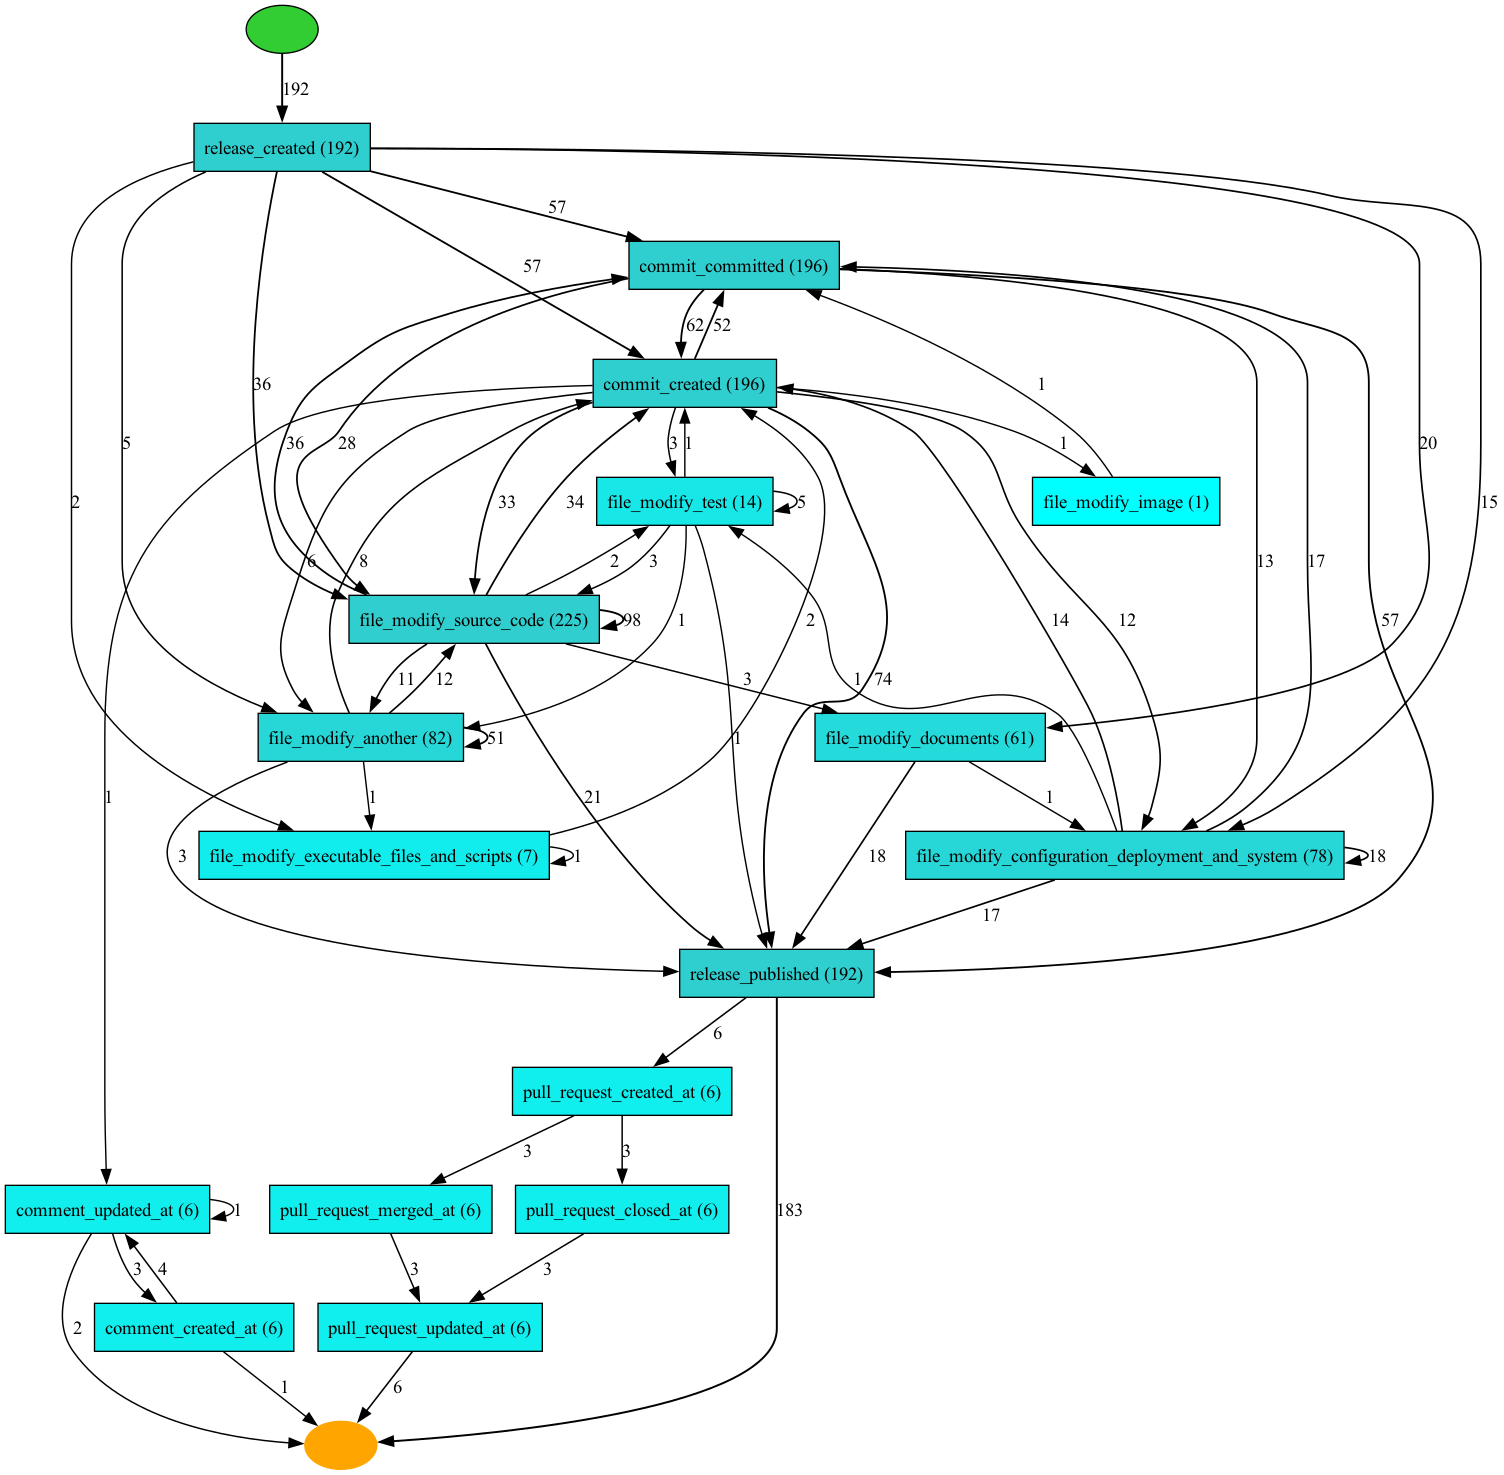

In [88]:
net = pm4py.discover_heuristics_net(release_start_log)
pm4py.view_heuristics_net(net)

## Process Discovery

### Для коммитов

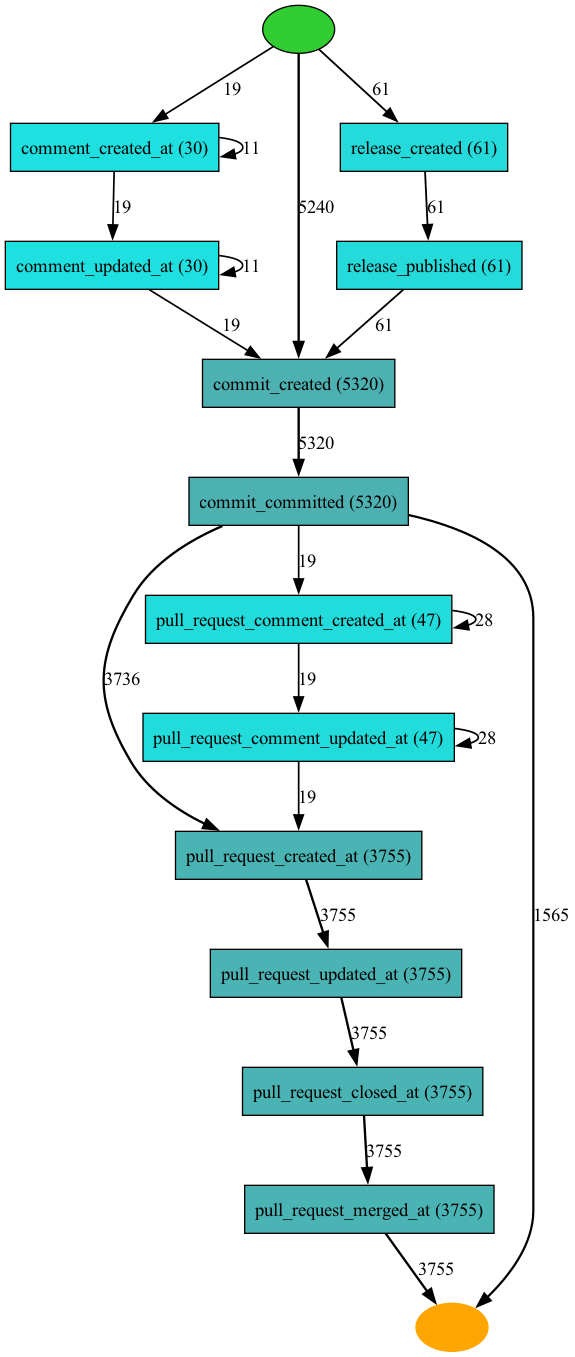

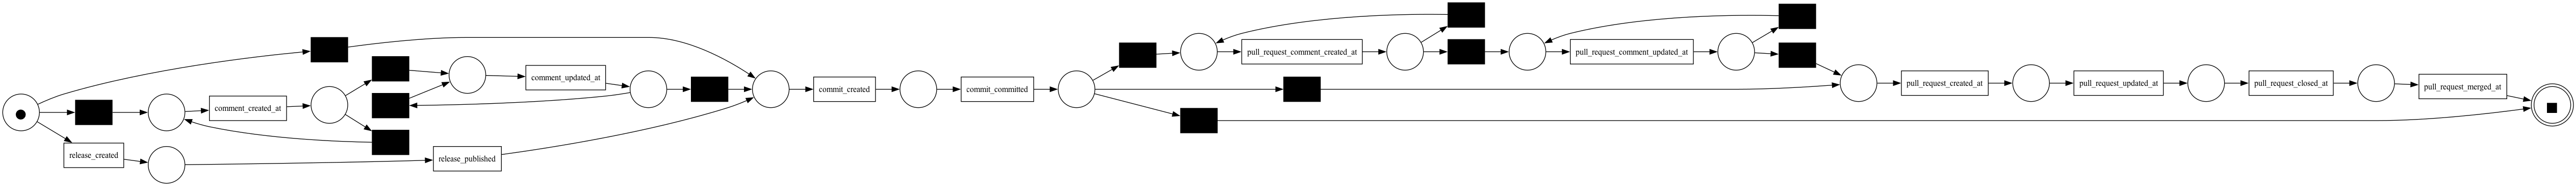

In [25]:
net = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(net)

net, im, fm = pm4py.discover_petri_net_heuristics(event_log)
pm4py.view_petri_net(net, im, fm)


## Diagnostic

In [26]:
fitness = pm4py.fitness_token_based_replay(event_log, net, im, fm)
print(fitness)
fitness = pm4py.fitness_alignments(event_log, net, im, fm)
print(fitness)

replaying log with TBR, completed traces ::   0%|          | 0/15 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


aligning log, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

{'percFitTraces': 100.0, 'averageFitness': 1.0, 'percentage_of_fitting_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 0.9999706564747788}


In [27]:
print(pm4py.precision_token_based_replay(event_log, net, im, fm))
print(pm4py.precision_alignments(event_log, net, im, fm))
conformance = pm4py.conformance_diagnostics_alignments(event_log, net, im, fm)
conformance

replaying log with TBR, completed traces ::   0%|          | 0/87 [00:00<?, ?it/s]

0.997727553414845


computing precision with alignments, completed variants ::   0%|          | 0/87 [00:00<?, ?it/s]

0.997727553414845


aligning log, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

[{'alignment': [('>>', None),
   ('comment_created_at', 'comment_created_at'),
   ('>>', None),
   ('comment_created_at', 'comment_created_at'),
   ('>>', None),
   ('comment_created_at', 'comment_created_at'),
   ('>>', None),
   ('comment_updated_at', 'comment_updated_at'),
   ('>>', None),
   ('comment_updated_at', 'comment_updated_at'),
   ('>>', None),
   ('comment_updated_at', 'comment_updated_at'),
   ('>>', None),
   ('commit_created', 'commit_created'),
   ('commit_committed', 'commit_committed'),
   ('>>', None)],
  'cost': 8,
  'visited_states': 20,
  'queued_states': 53,
  'traversed_arcs': 57,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('>>', None),
   ('comment_created_at', 'comment_created_at'),
   ('>>', None),
   ('comment_updated_at', 'comment_updated_at'),
   ('>>', None),
   ('commit_created', 'commit_created'),
   ('commit_committed', 'commit_committed'),
   ('>>', None)],
  'cost': 4,
  'visited_states': 8,
  'queued_states': 25,
  'trav

## Vizualization

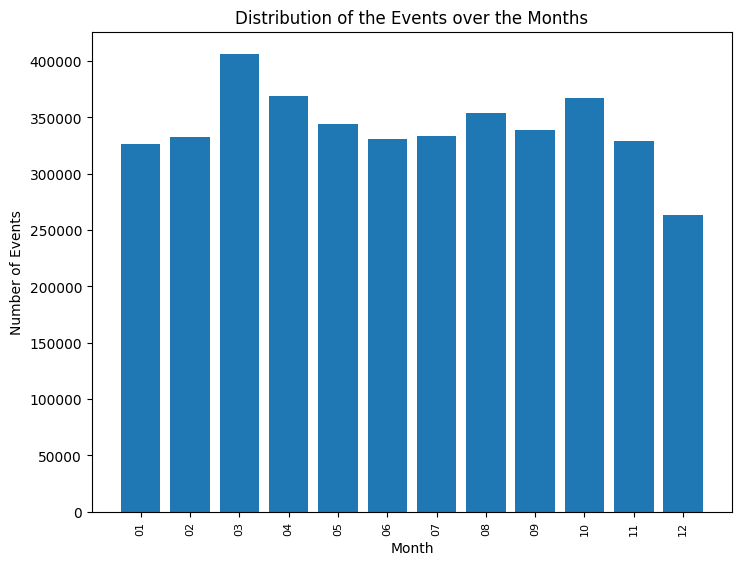

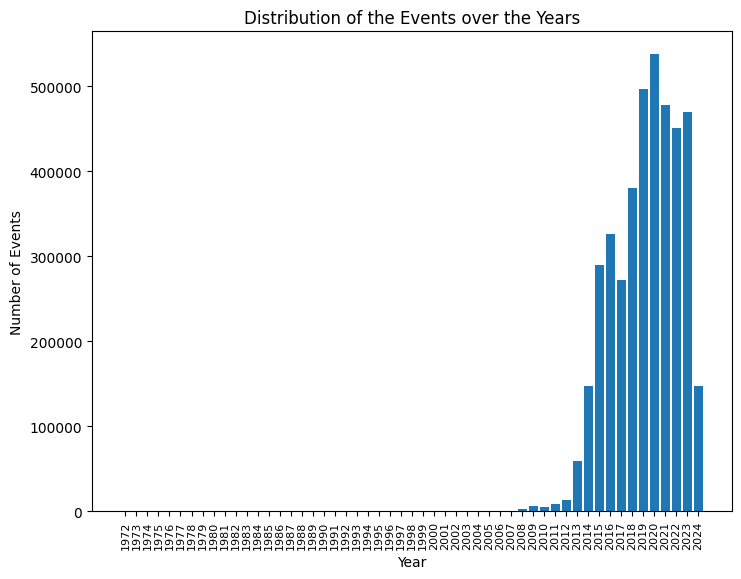

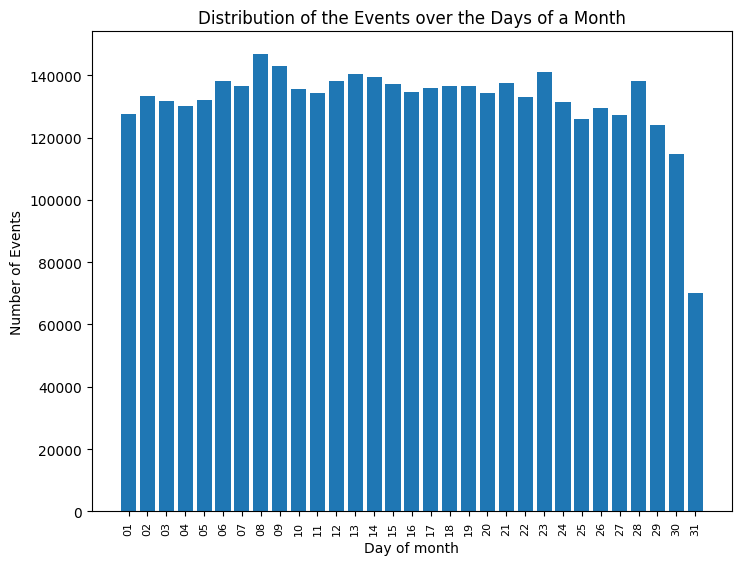

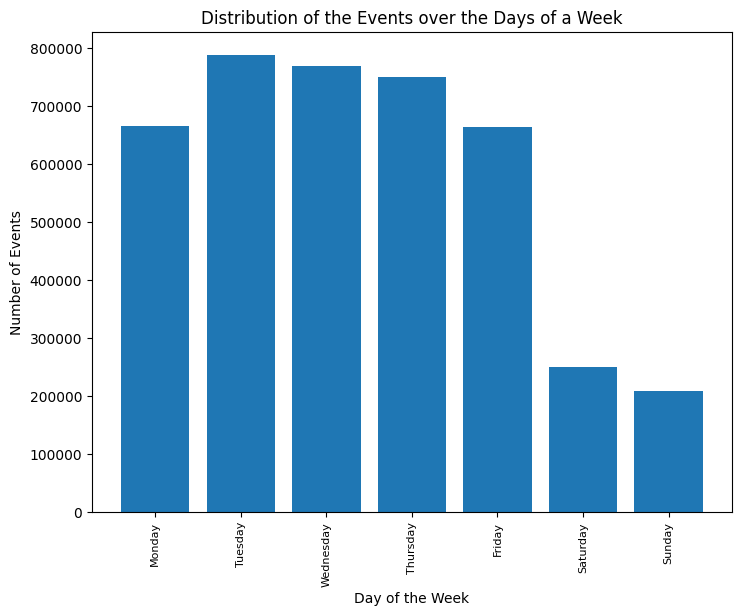

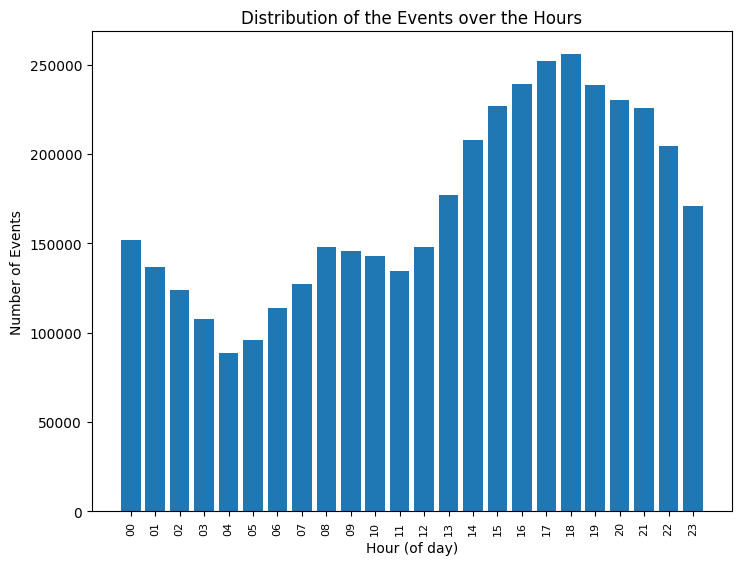

In [25]:
pm4py.view_events_distribution_graph(event_log, distr_type="months") 
pm4py.view_events_distribution_graph(event_log, distr_type="years") 
pm4py.view_events_distribution_graph(event_log, distr_type="days_month") 
pm4py.view_events_distribution_graph(event_log, distr_type="days_week") 
pm4py.view_events_distribution_graph(event_log, distr_type="hours") 

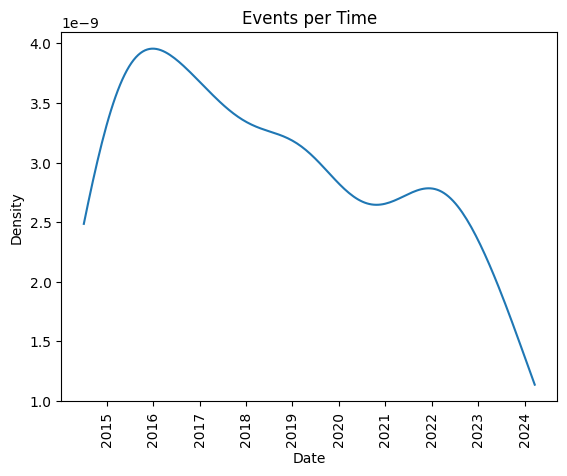

In [29]:
pm4py.view_events_per_time_graph(event_log)

In [1]:
pm4py.view_case_duration_graph(event_log)
pm4py.view_dotted_chart(event_log)

NameError: name 'pm4py' is not defined

# Process discovery по пользователям

In [33]:
def func_user(path, logs_list):
    user = pd.read_csv(
        f"{path}/user-commit.csv"
    )
    
    user.columns = ['user_' + str(col) for col in user.columns]
    user["user_event"] = "user_" + user["user_event"]
    user["activity"] = user["user_event"]
    user["case_id"] = user["user_commit_sha"]
    user["timestamp"] = pd.to_datetime(user["user_date"])
    del user["user_date"]
    user_event_log = dataframe_utils.convert_timestamp_columns_in_df(user)
    logs_list.append(user_event_log)

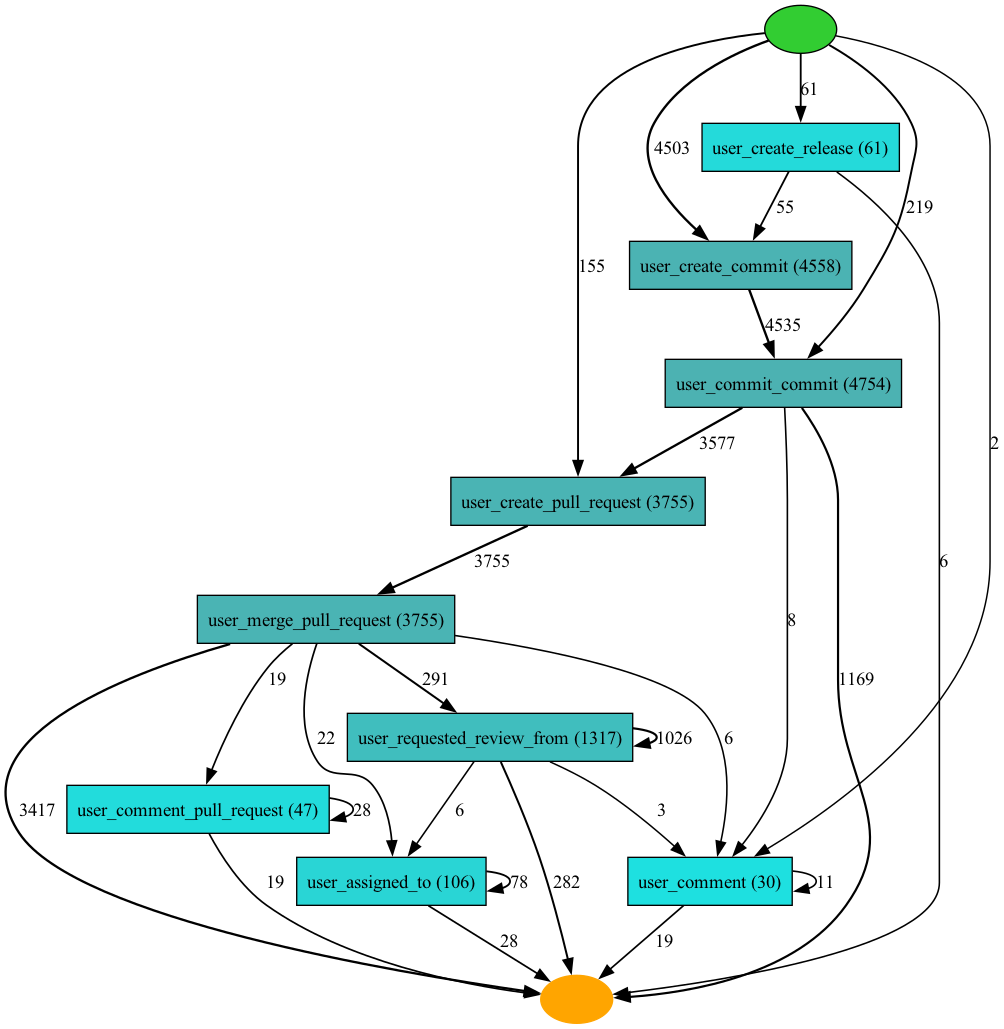

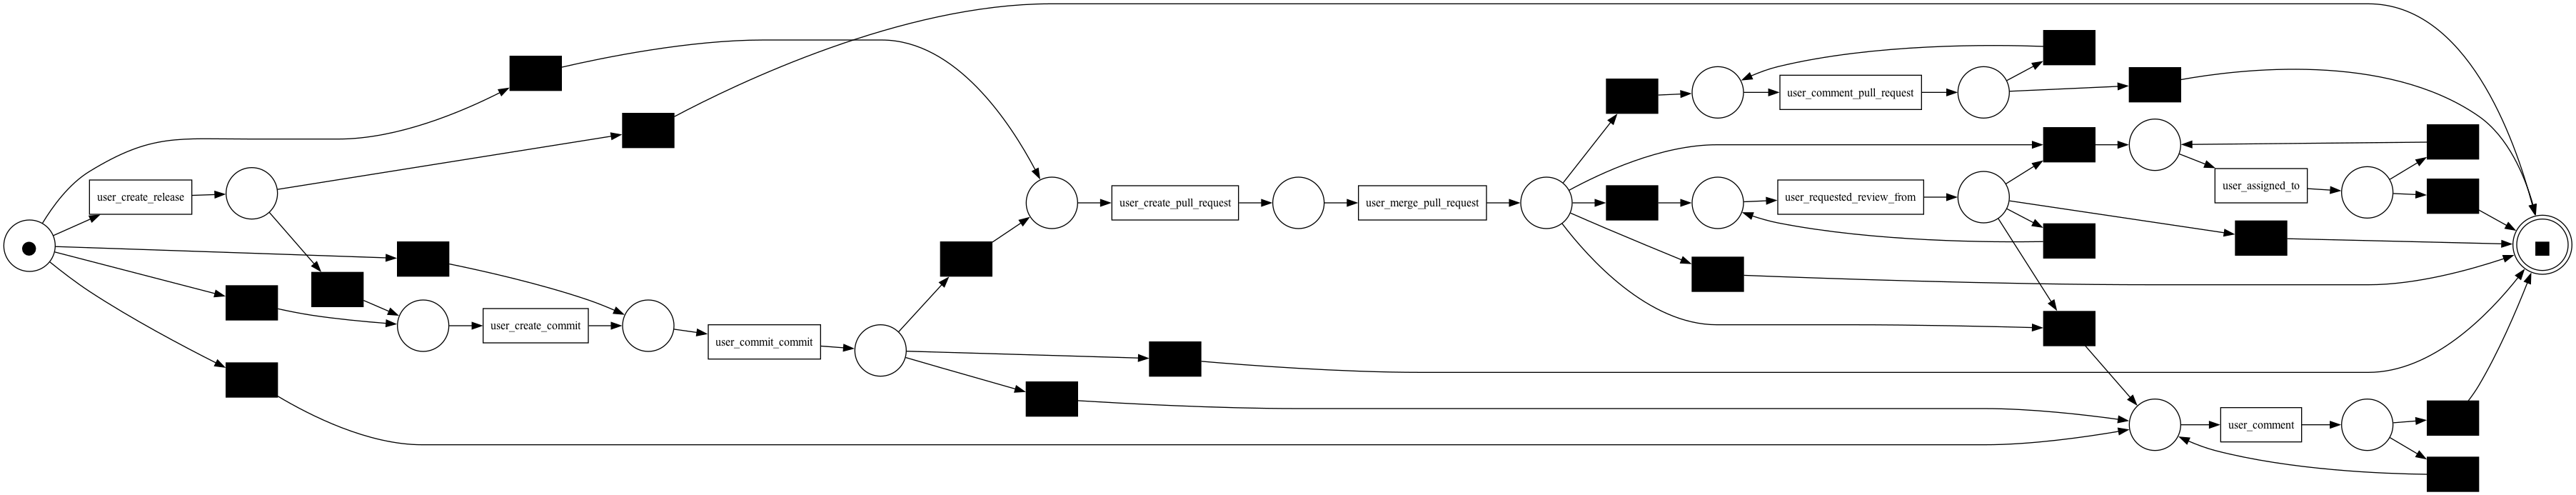

replaying log with TBR, completed traces ::   0%|          | 0/63 [00:00<?, ?it/s]

{'perc_fit_traces': 98.78542510121457, 'average_trace_fitness': 0.9986068238474768, 'log_fitness': 0.9984307571596704, 'percentage_of_fitting_traces': 98.78542510121457}


aligning log, completed variants ::   0%|          | 0/63 [00:00<?, ?it/s]

{'percFitTraces': 98.78542510121457, 'averageFitness': 0.9966039954197854, 'percentage_of_fitting_traces': 98.78542510121457, 'average_trace_fitness': 0.9966039954197854, 'log_fitness': 0.9938910053528001}


replaying log with TBR, completed traces ::   0%|          | 0/78 [00:00<?, ?it/s]

0.9995471877979027


computing precision with alignments, completed variants ::   0%|          | 0/78 [00:00<?, ?it/s]

0.9995471877979027


aligning log, completed variants ::   0%|          | 0/63 [00:00<?, ?it/s]

[{'alignment': [('user_create_release', 'user_create_release'),
   ('>>', None),
   ('user_create_commit', 'user_create_commit'),
   ('user_commit_commit', 'user_commit_commit'),
   ('>>', None)],
  'cost': 2,
  'visited_states': 5,
  'queued_states': 19,
  'traversed_arcs': 19,
  'lp_solved': 5,
  'fitness': 1.0,
  'bwc': 40001},
 {'alignment': [('user_create_release', 'user_create_release'),
   ('>>', None),
   ('user_create_commit', 'user_create_commit'),
   ('user_commit_commit', 'user_commit_commit'),
   ('>>', None)],
  'cost': 2,
  'visited_states': 5,
  'queued_states': 19,
  'traversed_arcs': 19,
  'lp_solved': 5,
  'fitness': 1.0,
  'bwc': 40001},
 {'alignment': [('user_create_release', 'user_create_release'),
   ('>>', None),
   ('user_create_commit', 'user_create_commit'),
   ('user_commit_commit', 'user_commit_commit'),
   ('>>', None)],
  'cost': 2,
  'visited_states': 5,
  'queued_states': 19,
  'traversed_arcs': 19,
  'lp_solved': 5,
  'fitness': 1.0,
  'bwc': 40001},
 

In [43]:
logs_list = []

for path in solo_paths:
    try:
        func_user(path, logs_list)
    except:
        continue
    
event_log_raw = pd.concat(logs_list, ignore_index=True)

event_log_raw = event_log_raw.rename(columns={
    "case_id": "case:concept:name",
    "activity": "concept:name",
    "timestamp": "time:timestamp"
})

event_log = log_converter.apply(event_log_raw)


net = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(net)
net, im, fm = pm4py.discover_petri_net_heuristics(event_log)
pm4py.view_petri_net(net, im, fm)

fitness = pm4py.fitness_token_based_replay(event_log, net, im, fm)
print(fitness)
fitness = pm4py.fitness_alignments(event_log, net, im, fm)
print(fitness)
print(pm4py.precision_token_based_replay(event_log, net, im, fm))
print(pm4py.precision_alignments(event_log, net, im, fm))
conformance = pm4py.conformance_diagnostics_alignments(event_log, net, im, fm)
conformance

# Process discovery по коммитам

In [11]:
def func_commit(path, logs_list):
    commits = pd.read_csv(f"{path}/commits.csv")

    commits["commit_date"] = pd.to_datetime(commits["commit_date"])
    commits["create_date"] = pd.to_datetime(commits["create_date"])
    commits.columns = ['commit_' + str(col) for col in commits.columns]
    commits["case_id"] = commits["commit_sha"]

    common_cols = [col for col in commits.columns if col not in ['commit_commit_date', 'commit_create_date']]

    commits_created = commits.copy()
    commits_created['timestamp'] = commits_created['commit_create_date']
    commits_created['activity'] = 'commit_created'
    commits_created = commits_created[common_cols + ['timestamp', 'activity']]

    commits_updated = commits.copy()
    commits_updated['timestamp'] = commits_updated['commit_commit_date']
    commits_updated['activity'] = 'commit_committed'
    commits_updated = commits_updated[common_cols + ['timestamp', 'activity']]

    commits_event_log = pd.concat([commits_created, commits_updated], ignore_index=True)
    commits_event_log = dataframe_utils.convert_timestamp_columns_in_df(commits_event_log)
    commits_shas = commits_event_log["case_id"].unique()

    def release_type(row):
        release_activity_type = row["release_activity_type"]
        if row["release_prerelease"] == True and row["release_draft"] == True:
            return f"release_draft_prerelease_{release_activity_type}"
        if row["release_prerelease"] == True and row["release_draft"] == False:
            return f"release_prerelease_{release_activity_type}"
        if row["release_prerelease"] == False and row["release_draft"] == True:
            return f"release_draft_{release_activity_type}"
        return f"release_{release_activity_type}"

    release = pd.read_csv(
        f"{path}/release-commit.csv"
    )
    release = release[release["commit_sha"].isin(commits_shas)]
    release["created_at"] = pd.to_datetime(release["created_at"])
    release["published_at"] = pd.to_datetime(release["published_at"])
    release.columns = ['release_' + str(col) for col in release.columns]
    release["case_id"] = release["release_commit_sha"]

    release_cols = [col for col in release.columns if col not in ['release_created_at', 'release_published_at']] + ['timestamp', 'activity']

    release_published = release.copy()
    release_published['timestamp'] = release_published['release_published_at']
    release_published['release_activity_type'] = "published"
    release_published['activity'] = release_published.apply(release_type, axis=1)

    release_published = release_published[release_cols]

    release_created = release.copy()
    release_created['timestamp'] = release_created['release_created_at']
    release_created['release_activity_type'] = "created"
    release_created['activity'] = release_created.apply(release_type, axis=1)
    release_created = release_created[release_cols]

    release_event_log = pd.concat([release_created, release_published], ignore_index=True)
    release_event_log = dataframe_utils.convert_timestamp_columns_in_df(release_event_log)

    pull_request = pd.read_csv(
        f"{path}/pull_request-commit.csv"
    )
    pull_request["updated_at"] = pd.to_datetime(pull_request["updated_at"])
    pull_request["created_at"] = pd.to_datetime(pull_request["created_at"])
    pull_request["closed_at"] = pd.to_datetime(pull_request["closed_at"])
    pull_request["merged_at"] = pd.to_datetime(pull_request["merged_at"])
    pull_request.columns = ['pull_request_' + str(col) for col in pull_request.columns]
    pull_request["case_id"] = pull_request["pull_request_commit_sha"]

    time_col = ['pull_request_created_at', 'pull_request_updated_at', 'pull_request_closed_at', 'pull_request_merged_at']
    pull_request_col = [col for col in pull_request.columns if col not in time_col]

    l = []
    for col in time_col:
        tmp = pull_request.copy()
        tmp['timestamp'] = tmp[col]
        tmp['activity'] = col
        tmp = tmp[pull_request_col + ['timestamp', 'activity']]
        l.append(tmp)

    pull_request_event_log = pd.concat(l, ignore_index=True)
    pull_request_event_log = dataframe_utils.convert_timestamp_columns_in_df(pull_request_event_log)

    comment_commit = pd.read_csv(f"{path}/comment-commit.csv")
    comment_commit["updated_at"] = pd.to_datetime(comment_commit["updated_at"])
    comment_commit["created_at"] = pd.to_datetime(comment_commit["created_at"])
    comment_commit.columns = ['comment_' + str(col) for col in comment_commit.columns]
    comment_commit["case_id"] = comment_commit["comment_commit_sha"]

    time_col = ['comment_created_at', 'comment_updated_at']
    comment_commit_col = [col for col in comment_commit.columns if col not in time_col]

    l = []
    for col in time_col:
        tmp = comment_commit.copy()
        tmp['timestamp'] = tmp[col]
        tmp['activity'] = col
        tmp = tmp[comment_commit_col + ['timestamp', 'activity']]
        l.append(tmp)

    comment_commit_event_log = pd.concat(l, ignore_index=True)


    pull_request_comment_commit = pd.read_csv(
        f"{path}/pull_request_comment-commit.csv"
    )
    pull_request_comment_commit["updated_at"] = pd.to_datetime(pull_request_comment_commit["updated_at"])
    pull_request_comment_commit["created_at"] = pd.to_datetime(pull_request_comment_commit["created_at"])
    pull_request_comment_commit.columns = ['pull_request_comment_' + str(col) for col in pull_request_comment_commit.columns]
    pull_request_comment_commit["case_id"] = pull_request_comment_commit["pull_request_comment_commit_sha"]

    time_col = ['pull_request_comment_created_at', 'pull_request_comment_updated_at']
    pull_request_comment_col = [col for col in pull_request_comment_commit.columns if col not in time_col]

    l = []
    for col in time_col:
        tmp = pull_request_comment_commit.copy()
        tmp['timestamp'] = tmp[col]
        tmp['activity'] = col
        tmp = tmp[pull_request_comment_col + ['timestamp', 'activity']]
        l.append(tmp)

    pull_request_comment_commit_event_log = pd.concat(l, ignore_index=True)
    pull_request_comment_commit_event_log = dataframe_utils.convert_timestamp_columns_in_df(pull_request_comment_commit_event_log)
    logs_list.extend([comment_commit_event_log, release_event_log, commits_event_log, pull_request_comment_commit_event_log, pull_request_event_log])


In [19]:
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.evaluation.precision import algorithm as precision
from pm4py.algo.evaluation.generalization import algorithm as generalization
from pm4py.algo.evaluation.simplicity import algorithm as simplicity
from pm4py.algo.evaluation.simplicity import algorithm as simplicity

def diagnostic(event_log, net, im, fm):
    # 1. Вычисляем фитнес с использованием выравниваний
    # fitness_alignments = alignments.apply(event_log, net, im, fm)
    # print("Fitness (alignments):", fitness_alignments)
    # print("Fitness (alignments):", pm4py.fitness_alignments(event_log, net, im, fm))

    # 2. Вычисляем фитнес с использованием token-based replay
    # fitness_token = token_replay.apply(event_log, net, im, fm)
    # print("Fitness (token based):", fitness_token)
    print("Fitness (token based):", pm4py.fitness_token_based_replay(event_log, net, im, fm))
    # 3. Вычисляем точность модели (precision)
    # print("Precision (alignments):", precision.apply(event_log, net, im, fm))
    
    print("Precision (token based):", pm4py.precision_token_based_replay(event_log, net, im, fm))
    
    # 4. Вычисляем генерализацию модели
    generalization_value = generalization.apply(event_log, net, im, fm)
    print("Generalization:", generalization_value)

    # 5. Вычисляем простоту модели (simplicity)
    simplicity_value = simplicity.apply(net)
    print("Simplicity:", simplicity_value)



In [21]:
logs_list = []

for path in paths:
    try:
        func_commit(path, logs_list)
    except:
        continue
    
event_log_raw = pd.concat(logs_list, ignore_index=True)

event_log_raw = event_log_raw.rename(columns={
    "case_id": "case:concept:name",
    "activity": "concept:name",
    "timestamp": "time:timestamp"
})

event_log = log_converter.apply(event_log_raw)

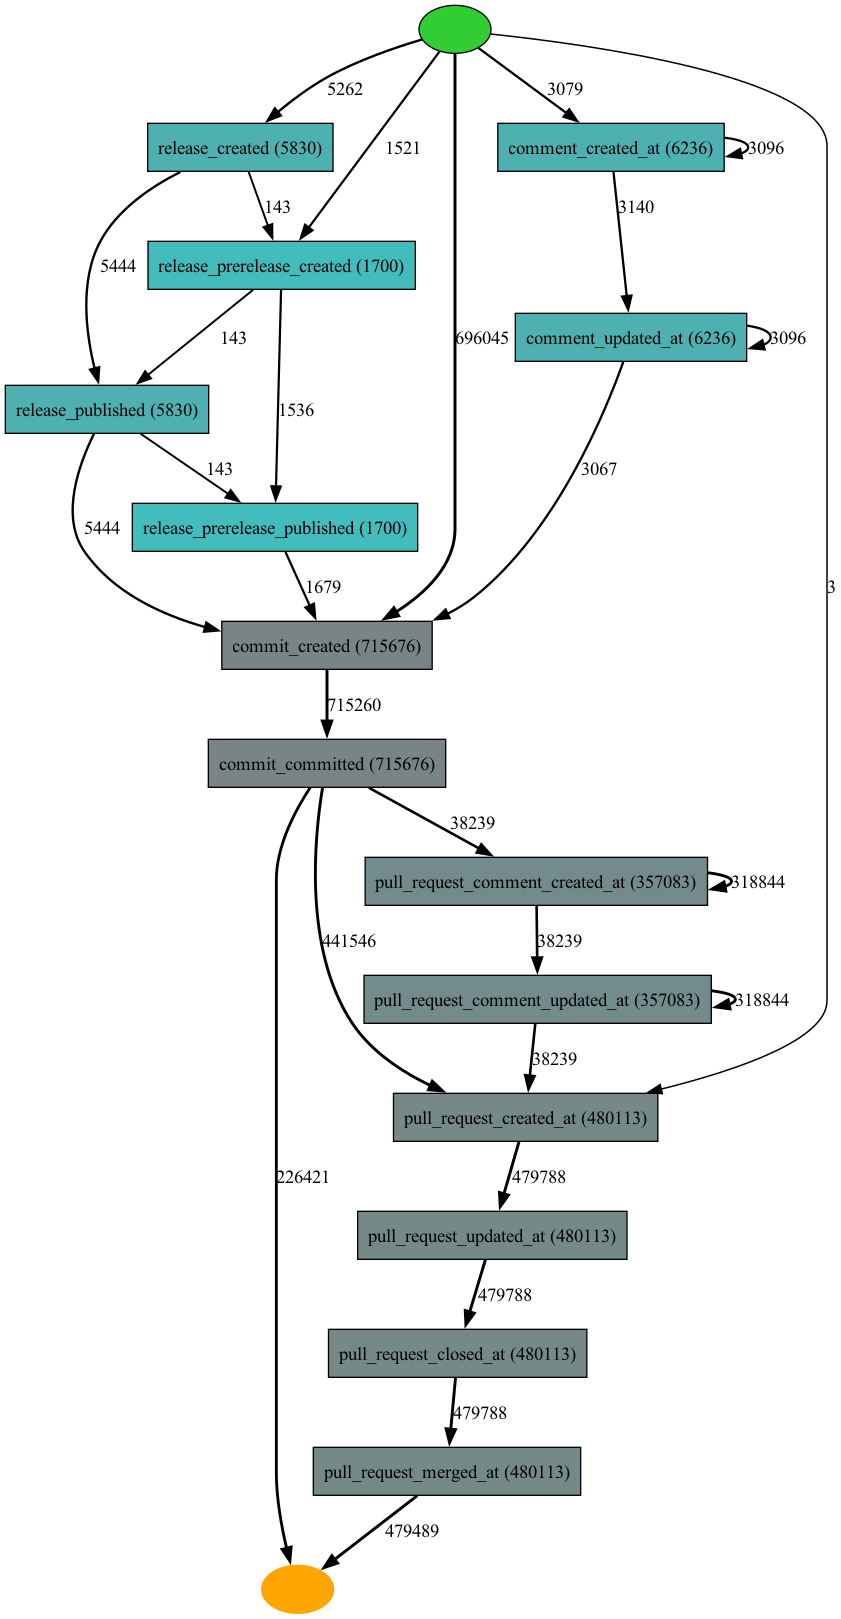

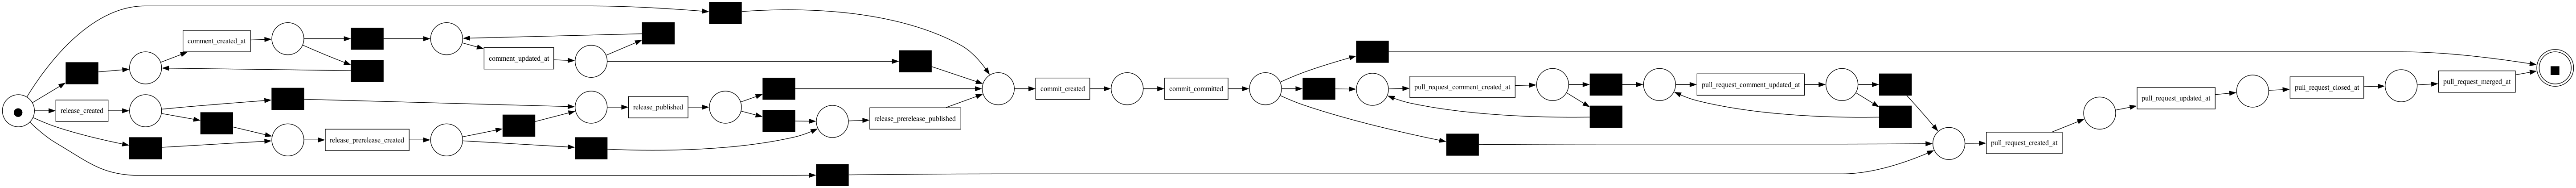

replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Fitness (token based): {'perc_fit_traces': 98.59996316810926, 'average_trace_fitness': 0.9982391430481405, 'log_fitness': 0.9985452605365678, 'percentage_of_fitting_traces': 98.59996316810926}


replaying log with TBR, completed traces ::   0%|          | 0/30560 [00:00<?, ?it/s]

Precision (token based): 0.953814518025629


replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Generalization: 0.9676868520713872
Simplicity: 0.7073170731707318


In [22]:
net = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(net)

net, im, fm = pm4py.discover_petri_net_heuristics(event_log)
pm4py.view_petri_net(net, im, fm)

diagnostic(event_log, net, im, fm)

In [ ]:
net, im, fm = pm4py.discover_petri_net_alpha_plus(event_log)
pm4py.view_petri_net(net, im, fm)

diagnostic(event_log, net, im, fm)

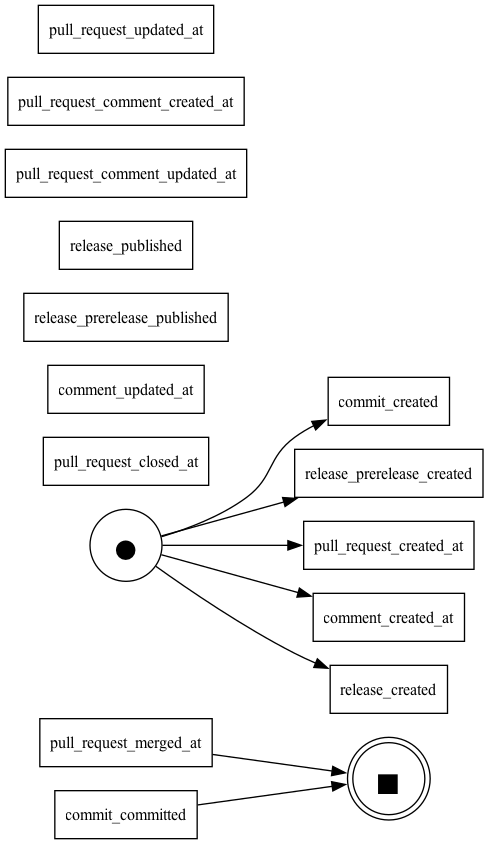

replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Fitness (token based): {'perc_fit_traces': 30.368743890864273, 'average_trace_fitness': 0.7674628425653324, 'log_fitness': 0.7397315713723285, 'percentage_of_fitting_traces': 30.368743890864273}


replaying log with TBR, completed traces ::   0%|          | 0/30560 [00:00<?, ?it/s]

Precision (token based): 0.21236300401885377


replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Generalization: 0.9920349117250232
Simplicity: 1.0


In [23]:
net, im, fm = pm4py.discover_petri_net_alpha(event_log)
pm4py.view_petri_net(net, im, fm)

diagnostic(event_log, net, im, fm)

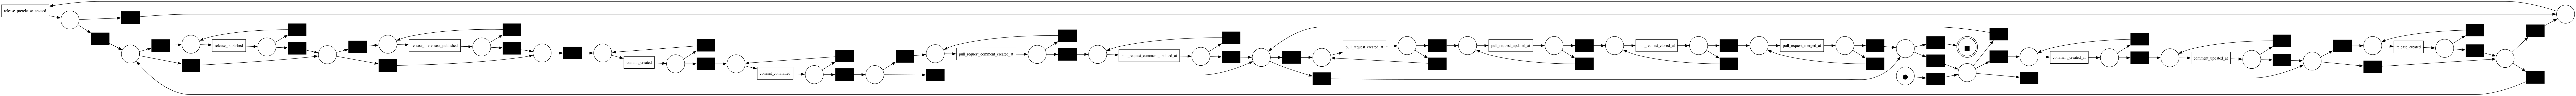

replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Fitness (token based): {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces ::   0%|          | 0/30560 [00:00<?, ?it/s]

Precision (token based): 0.6006540653875068


replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Generalization: 0.9694143769306122
Simplicity: 0.6944444444444444


In [24]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, im, fm)

diagnostic(event_log, net, im, fm)

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/29 [00:00<?, ?it/s]

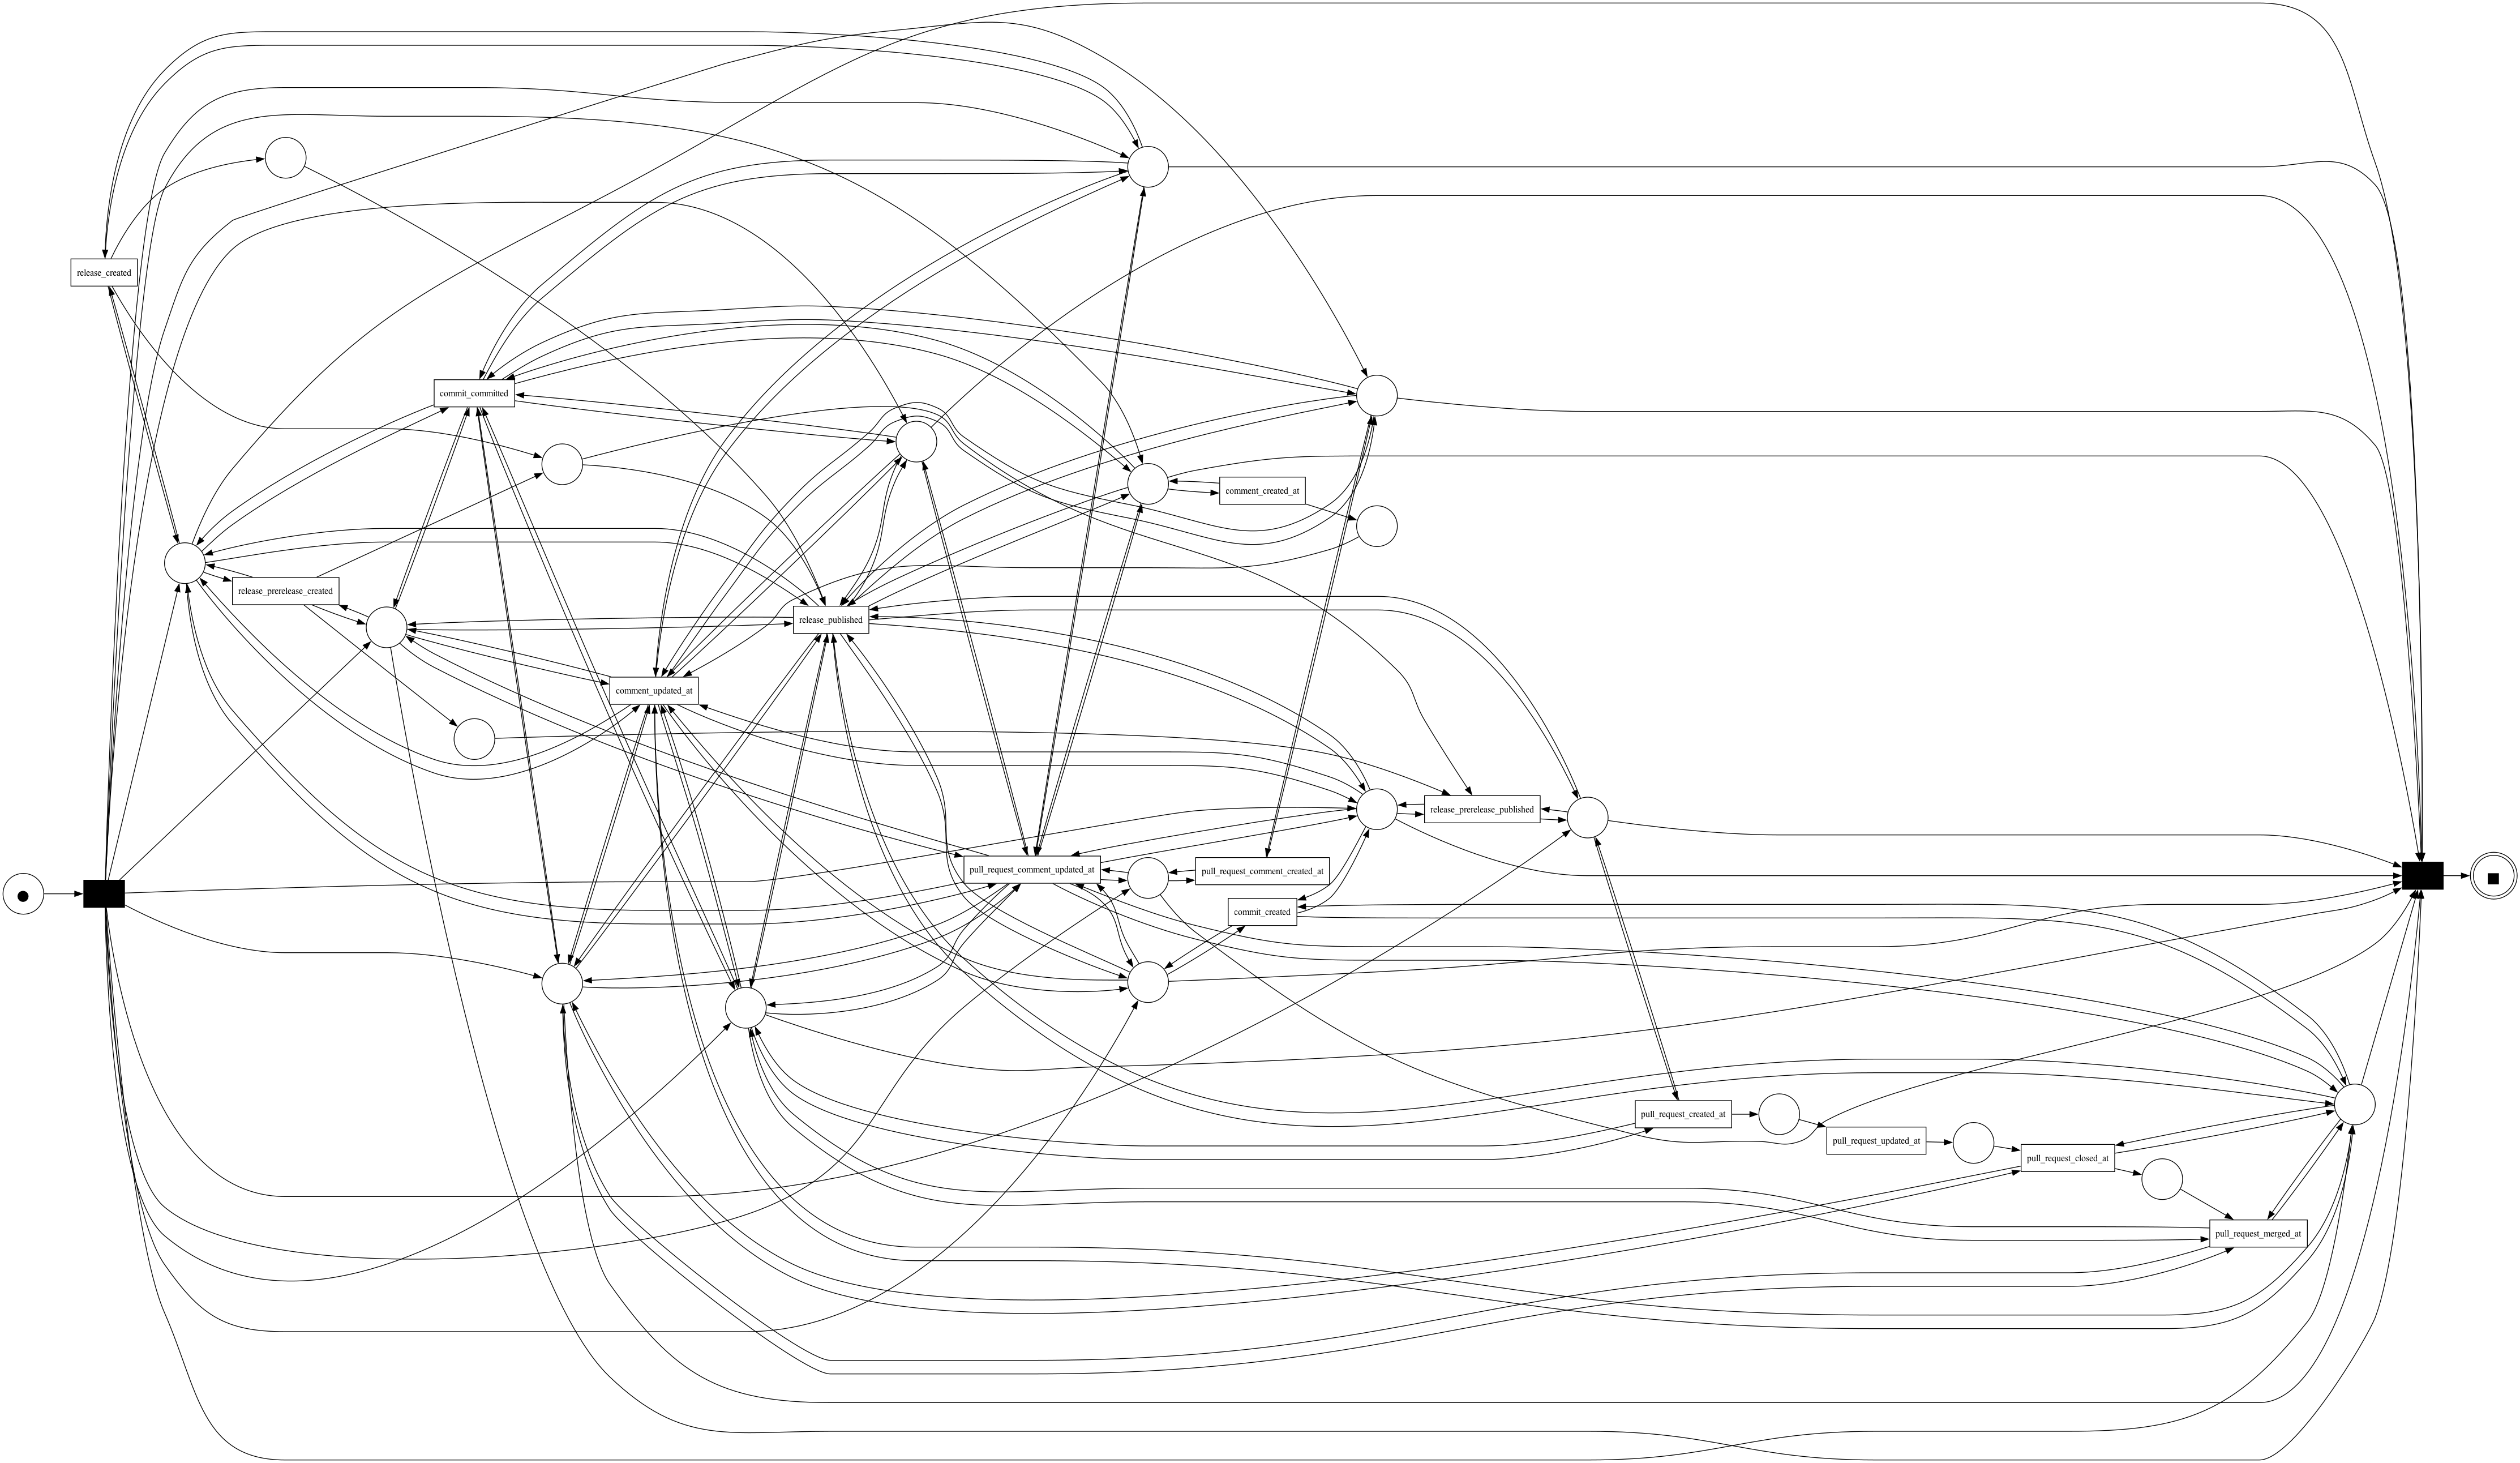

replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Fitness (token based): {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces ::   0%|          | 0/30560 [00:00<?, ?it/s]

Precision (token based): 0.3044688141649712


replaying log with TBR, completed traces ::   0%|          | 0/443 [00:00<?, ?it/s]

Generalization: 0.9928817709139854
Simplicity: 0.13286713286713286


In [26]:
net, im, fm = pm4py.discover_petri_net_ilp(event_log)
pm4py.view_petri_net(net, im, fm)

diagnostic(event_log, net, im, fm)

discover_petri_net_ilp:
Fitness (token based): {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Precision (token based): 0.3044688141649712
Generalization: 0.9928817709139854
Simplicity: 0.13286713286713286

discover_petri_net_inductive
Fitness (token based): {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Precision (token based): 0.6006540653875068
Generalization: 0.9694143769306122
Simplicity: 0.6944444444444444

discover_petri_net_alpha
Fitness (token based): {'perc_fit_traces': 30.368743890864273, 'average_trace_fitness': 0.7674628425653324, 'log_fitness': 0.7397315713723285, 'percentage_of_fitting_traces': 30.368743890864273}
Precision (token based): 0.21236300401885377
Generalization: 0.9920349117250232
Simplicity: 1.0

Сделай сравнительный анализ, опиши его